In [1]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
stocks = input("Enter stock code: ")
data = yf.download(stocks, "2024-01-01", "2025-01-01", auto_adjust=True)
data.head()

Enter stock code:  BTC


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC,BTC,BTC,BTC,BTC
Date,,,,,
2024-07-31,28.950001,29.650000,28.799999,29.500000,930940
2024-08-01,28.100000,28.799999,27.600000,28.650000,8564500
2024-08-02,27.799999,29.049999,27.650000,28.750000,2412560
2024-08-05,23.750000,24.650000,22.000000,22.049999,3141140
2024-08-06,25.250000,25.350000,24.150000,24.500000,1690140


In [12]:
data.shape

(107, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2024-07-31 to 2024-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, BTC)   107 non-null    float64
 1   (High, BTC)    107 non-null    float64
 2   (Low, BTC)     107 non-null    float64
 3   (Open, BTC)    107 non-null    float64
 4   (Volume, BTC)  107 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.0 KB


In [14]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC,BTC,BTC,BTC,BTC
count,107.000000,107.000000,107.000000,107.000000,1.070000e+02
mean,32.724486,33.284374,32.148084,32.712430,1.877000e+06
std,7.278700,7.444727,7.162358,7.321729,1.254465e+06
min,23.750000,24.650000,22.000000,22.049999,6.206800e+05
25%,26.700001,27.182500,26.172501,26.850000,1.151590e+06
50%,29.400000,29.650000,28.870001,29.500000,1.416080e+06
75%,41.154999,42.039999,40.440001,41.014999,2.176100e+06
max,47.299999,48.070000,46.869999,47.790001,8.564500e+06


<Axes: xlabel='Date'>

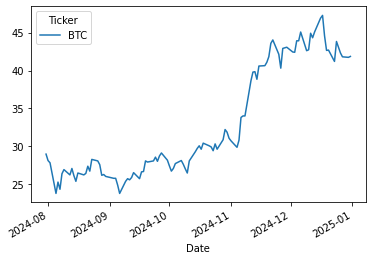

In [15]:
data.Close.plot()

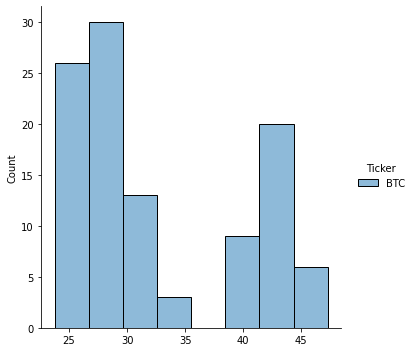

In [16]:
sns.displot(data["Close"])

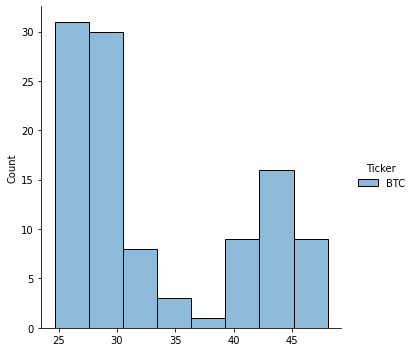

In [17]:
sns.displot(data["High"])

In [18]:
X = data.drop("Close", axis=1)
y = data["Close"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(85, 4)
(22, 4)
(85, 1)
(22, 1)


In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge(1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(1.0)
lasso.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
# r2 -> 1 -> good model

def calculate_metrics(title, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)
    print(f"{title}'s result:")
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2: ", r2_scors)

calculate_metrics("Linear Regression", y_test, pred_lr)
calculate_metrics("Ridge Regression", y_test, pred_ridge)
calculate_metrics("Lasso Regression", y_test, pred_lasso)

Linear Regression's result:
MSE:  0.08193573929718577
RMSE:  0.2862441952200704
R2:  0.9981707360525187
Ridge Regression's result:
MSE:  0.08988383653424269
RMSE:  0.2998063317113945
R2:  0.9979932900704414
Lasso Regression's result:
MSE:  0.2593670588127177
RMSE:  0.5092809232758652
R2:  0.9942094766713523


In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

params = {'C': [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf']}

grid = GridSearchCV(SVR(), params, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.041 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.157 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.084 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.721 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.438 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.041 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.157 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.084 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.721 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.438 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.041 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was 

[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.650 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.467 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.045 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.167 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.091 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.650 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.467 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.045 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.167 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.091 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.650 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.467 total time=   0.0s
[CV 1/5] END ........C=10, g

C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was 

[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.086 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.062 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.121 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.086 total time=   0.0s
[CV 1/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 2/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 3/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.051 total time=   0.0s
[CV 4/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.085 total time=   0.0s
[CV 5/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.059 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 2/5] END .....C=100, gam

C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was 

[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.051 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.085 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.059 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.051 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.085 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.059 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 3/5] END .C=1000, gamma=

C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [27]:
svr = SVR(C=100, gamma=1, kernel='rbf')
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)

C:\Users\Tho Le\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
calculate_metrics("SVR", y_test, pred_svr)

SVR's result:
MSE:  44.87195390877117
RMSE:  6.698653141398737
R2:  -0.001792969007536671


In [30]:
import joblib
joblib.dump(lr, 'model.pkl')
lr_from_joblib = model = joblib.load('model.pkl')